<a href="https://colab.research.google.com/github/zg104/DataScience/blob/master/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone

## [Data Preparation](#dp)
## [EDA](#eda)
## [Logistic Regression](#lr)
## [Model Evaluation](#ME)
## [Conclusion](#c)




## <span id="dp">Data Preparation</span>

### Load the data

In [147]:
## Mounting Google Drive locally
from google.colab import drive
drive.mount('/content/drive/')

cancer_df = pd.read_csv('/content/drive/My Drive/Capstone/cancer readmission dataset deidentified.csv')
cancer_df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01400,A01400,N01700,...,N07220,A07220,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N09750,A09750,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,1,802640.0,474470.0,99850.0,216600.0,717050.0,44090.0,426090.0,580390.0,1259760.0,475750.0,25570.0,17310.0,8250.0,5670.0,212170.0,150660.0,10467448.0,802640.0,10626881.0,640460.0,8368271.0,89770.0,54949.0,40190.0,67982.0,35970.0,45716.0,8330.0,4383.0,144200.0,741047.0,33800.0,35843.0,37360.0,236386.0,102180.0,...,27250.0,8374.0,870.0,483.0,112110.0,153786.0,54300.0,390448.0,56390.0,397723.0,14430.0,8483.0,741920.0,2078353.0,353820.0,1078908.0,324630.0,967560.0,221720.0,283322.0,55630.0,51730.0,23200.0,14464.0,255600.0,161796.0,363870.0,327165.0,0.0,0.0,0.0,0.0,64680.0,53602.0,700940.0,1803125.0,698100.0,1796343.0,2860.0,4917.0
1,1,AL,0,2,499070.0,218590.0,137460.0,129760.0,448190.0,26230.0,269560.0,365010.0,985860.0,352150.0,11550.0,7570.0,3980.0,370.0,120760.0,112510.0,17977581.0,499070.0,18153235.0,429020.0,14801613.0,90100.0,62310.0,39370.0,91981.0,34800.0,64670.0,41160.0,23705.0,67150.0,254049.0,31780.0,77816.0,36500.0,356129.0,99740.0,...,120230.0,106522.0,7380.0,6388.0,38700.0,86925.0,27970.0,188902.0,29050.0,201292.0,18970.0,13043.0,487380.0,2065629.0,138510.0,295395.0,115390.0,249017.0,100530.0,139491.0,31740.0,28933.0,6510.0,6541.0,380780.0,896996.0,401700.0,1003316.0,0.0,0.0,0.0,0.0,77660.0,118725.0,419640.0,1175607.0,416180.0,1165352.0,4250.0,8894.0
2,1,AL,0,3,268590.0,89780.0,134440.0,38280.0,241060.0,14160.0,156410.0,175150.0,584720.0,181950.0,2780.0,1430.0,1350.0,0.0,44750.0,78030.0,16502473.0,268590.0,16659518.0,229300.0,12727137.0,82080.0,64795.0,38570.0,122427.0,35410.0,88866.0,54360.0,37829.0,41690.0,266422.0,32780.0,121012.0,30100.0,402312.0,72260.0,...,74240.0,111795.0,5820.0,5791.0,27650.0,70831.0,3850.0,27765.0,6650.0,47490.0,4510.0,4911.0,264520.0,1799819.0,90.0,33.0,20.0,8.0,9660.0,12750.0,16310.0,15019.0,80.0,88.0,254580.0,1303768.0,258100.0,1388200.0,0.0,0.0,0.0,0.0,67820.0,156752.0,201030.0,560461.0,197060.0,547812.0,5440.0,13482.0
3,1,AL,0,4,170880.0,32180.0,124070.0,11660.0,154120.0,7980.0,101650.0,106500.0,425800.0,130670.0,730.0,420.0,310.0,0.0,20160.0,53770.0,14817087.0,170900.0,14951547.0,146490.0,11098156.0,69200.0,60626.0,34510.0,132608.0,31260.0,96413.0,49240.0,40351.0,29580.0,249368.0,28970.0,153144.0,23990.0,430430.0,53310.0,...,54170.0,88819.0,2290.0,2031.0,19760.0,57506.0,230.0,1509.0,1380.0,9404.0,720.0,1162.0,169120.0,1721162.0,0.0,0.0,0.0,0.0,180.0,237.0,11340.0,10469.0,0.0,0.0,168810.0,1391918.0,169380.0,1465080.0,0.0,0.0,0.0,0.0,48440.0,141721.0,121930.0,396526.0,118460.0,383588.0,3160.0,12369.0
4,1,AL,0,5,229870.0,22810.0,196990.0,5540.0,208380.0,11120.0,136470.0,117930.0,630970.0,204340.0,690.0,650.0,40.0,0.0,13650.0,74020.0,31131390.0,229850.0,31461757.0,202630.0,22900238.0,123960.0,152168.0,72860.0,417240.0,67830.0,319909.0,109080.0,118952.0,45280.0,679483.0,64050.0,628310.0,38210.0,1017867.0,77350.0,...,47890.0,64780.0,3090.0,1928.0,32290.0,134318.0,0.0,0.0,330.0,2512.0,240.0,574.0,227720.0,4273327.0,0.0,0.0,0.0,0.0,0.0,0.0,18760.0,17760.0,0.0,0.0,228870.0,3979974.0,229110.0,4147216.0,350.0,104.0,50.0,19.0,91100.0,465160.0,138250.0,588068.0,130970.0,529001.0,8430.0,55564.0


In [148]:
### import libraries ###

# basic
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV, cross_validate  #Perforing grid search
from matplotlib.legend_handler import HandlerLine2D

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 5

### Descriptive Analysis

In [149]:
# check the shape of the data
cancer_df.shape

(5953, 111)

In [157]:
cancer_df

0       2504
1       2433
2       2637
3       1017
4       1223
        ... 
5948    3058
5949    3332
5950    1490
5951    4128
5952    5881
Name: _, Length: 5953, dtype: int64

In [150]:
# describe the data
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5953 entries, 0 to 5952
Columns: 111 entries, _ to ZIPCODE
dtypes: float64(45), int64(20), object(46)
memory usage: 5.0+ MB


### Data Quality Check

In [151]:
# data quality check
# null value check 
cancer_df.isna().sum()

_                0
visitid          0
siteid           0
patientnumber    0
admissiondate    0
                ..
race2            0
race3            0
discharge        0
discharge2       0
ZIPCODE          0
Length: 111, dtype: int64

## <span id="eda">EDA</span>

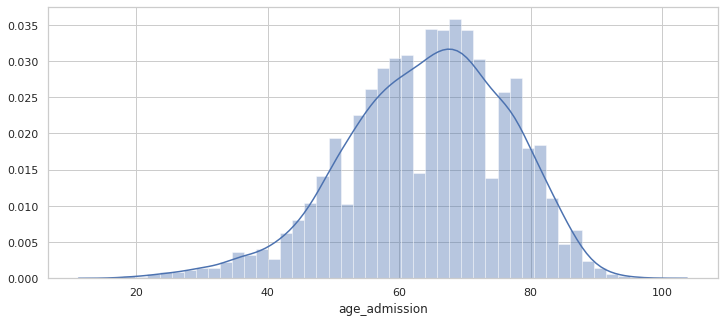

In [152]:
age = cancer_df["age_admission"]
sns.distplot(age)

In [153]:
# cancer_df.age_admission >= 65
# cancer_df[cancer_df.age_admission >=65 ]

In [154]:
# get rid of 4 patients that have no ICD-9
cancer_df = cancer_df[(cancer_df['PatientID'] != 2736) &
   (cancer_df['PatientID'] != 3640) &
   (cancer_df['PatientID'] != 3726) &
   (cancer_df['PatientID'] != 3851)]

KeyError: ignored

In [75]:
fea_col = "gender age_admission race3 hospital group_type comorbidities complications admissiondate readmission_30 readmission_90".split()
# Just select all needs variables in the dataset
fea_col
# Have a glance at the those column names

['gender',
 'age_admission',
 'race3',
 'hospital',
 'group_type',
 'comorbidities',
 'complications',
 'admissiondate',
 'readmission_30',
 'readmission_90']

In [76]:
# df = cancer_df[cancer_df["age_admission"]>=65][fea_col]
# df

In [77]:
# df.admissiondate = df["admissiondate"].map(lambda x: x[-4:])#Only take the last four number as the year
# df.head()
# #Transform admissiondate to year of admission

In [78]:
df = cancer_df

In [79]:
# df = df[(df["admissiondate"] >= 2003) & (df["admissiondate"] <= 2012)]

In [80]:
# select feature columns we use
df = df[fea_col]

In [81]:
# drop patientID
df

,gender,age_admission,race3,hospital,group_type,comorbidities,complications,admissiondate,readmission_30,readmission_90
0,Male,57,White,Montgomery General Hospital,Colon_Rectum,1,3,3/13/2014,0,0
1,Male,62,White,Montgomery General Hospital,Colon_Rectum,0,0,7/17/2014,0,0
2,Female,70,African American or Black,Montgomery General Hospital,Colon_Rectum,2,2,10/10/2014,0,0
3,Female,64,White,Montgomery General Hospital,Colon_Rectum,1,4,11/1/2014,0,1
4,Female,90,African American or Black,Montgomery General Hospital,Colon_Rectum,4,5,3/28/2014,0,0
...,...,...,...,...,...,...,...,...,...,...
5948,Female,79,White,St.Mary's Hospital,Colon_Rectum,2,0,7/5/2013,0,0
5949,Female,63,African American or Black,St.Mary's Hospital,Colon_Rectum,1,2,4/16/2013,0,0
5950,Male,56,White,St.Mary's Hospital,Colon_Rectum,1,0,12/20/2012,0,0
5951,Male,49,White,St.Mary's Hospital,Colon_Rectum,0,0,8/29/2012,0,0


In [82]:
# df.to_csv('cleaned_df.csv')

## Data Visualization

### Count Plot

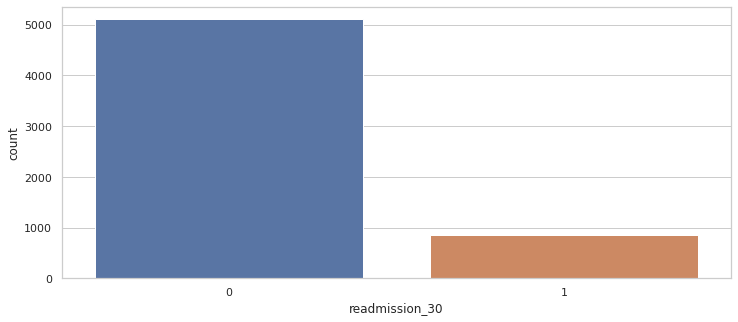

In [83]:
sns.countplot(cancer_df.readmission_30)
# Descriptive statistic summary for age for the patients

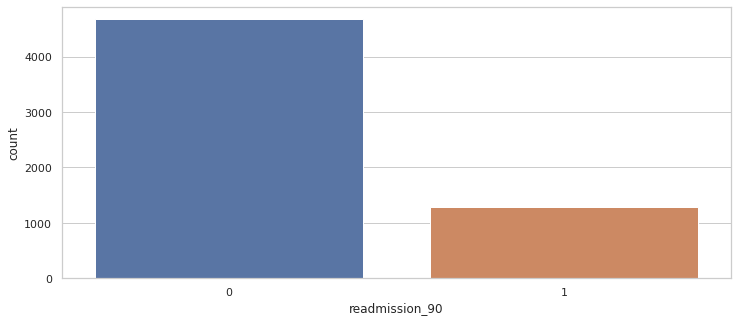

In [84]:
sns.countplot(cancer_df.readmission_90)

In [85]:
df

,gender,age_admission,race3,hospital,group_type,comorbidities,complications,admissiondate,readmission_30,readmission_90
0,Male,57,White,Montgomery General Hospital,Colon_Rectum,1,3,3/13/2014,0,0
1,Male,62,White,Montgomery General Hospital,Colon_Rectum,0,0,7/17/2014,0,0
2,Female,70,African American or Black,Montgomery General Hospital,Colon_Rectum,2,2,10/10/2014,0,0
3,Female,64,White,Montgomery General Hospital,Colon_Rectum,1,4,11/1/2014,0,1
4,Female,90,African American or Black,Montgomery General Hospital,Colon_Rectum,4,5,3/28/2014,0,0
...,...,...,...,...,...,...,...,...,...,...
5948,Female,79,White,St.Mary's Hospital,Colon_Rectum,2,0,7/5/2013,0,0
5949,Female,63,African American or Black,St.Mary's Hospital,Colon_Rectum,1,2,4/16/2013,0,0
5950,Male,56,White,St.Mary's Hospital,Colon_Rectum,1,0,12/20/2012,0,0
5951,Male,49,White,St.Mary's Hospital,Colon_Rectum,0,0,8/29/2012,0,0


<Figure size 864x360 with 0 Axes>

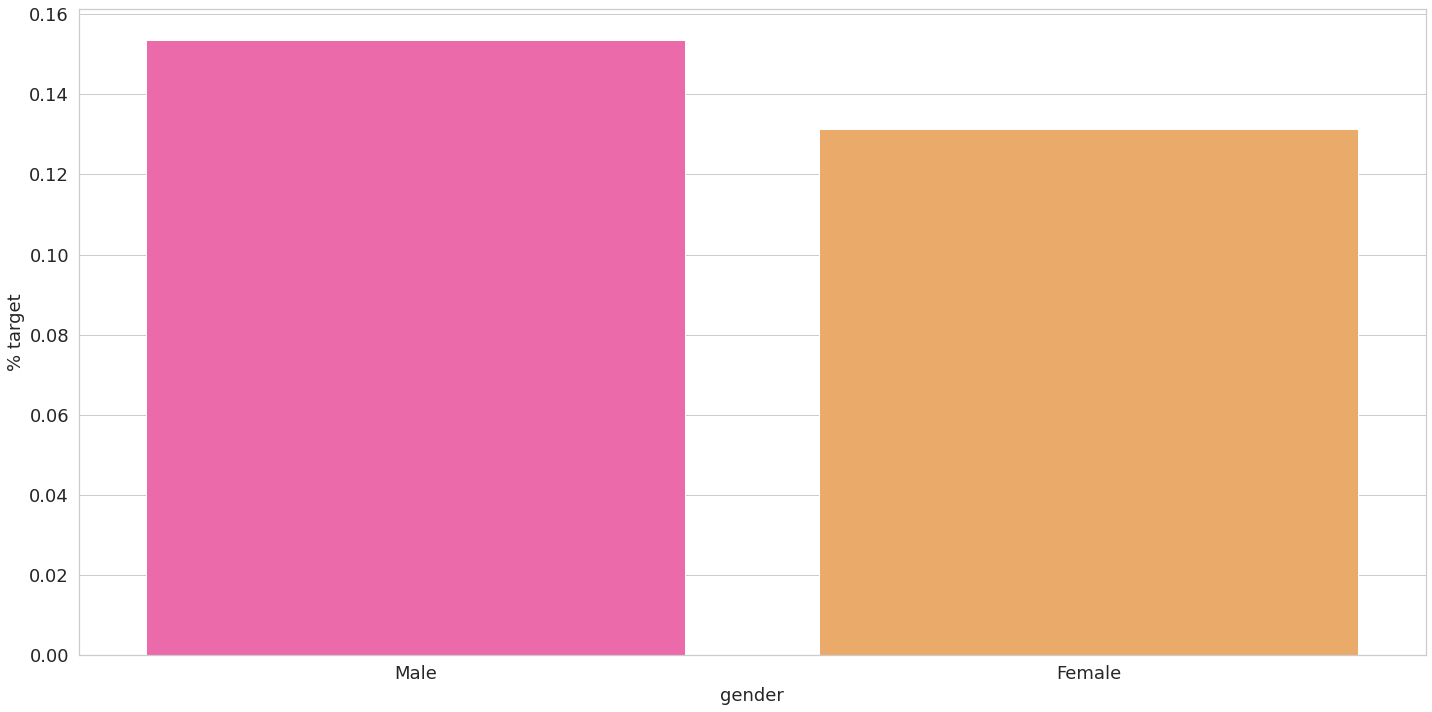

<Figure size 864x360 with 0 Axes>

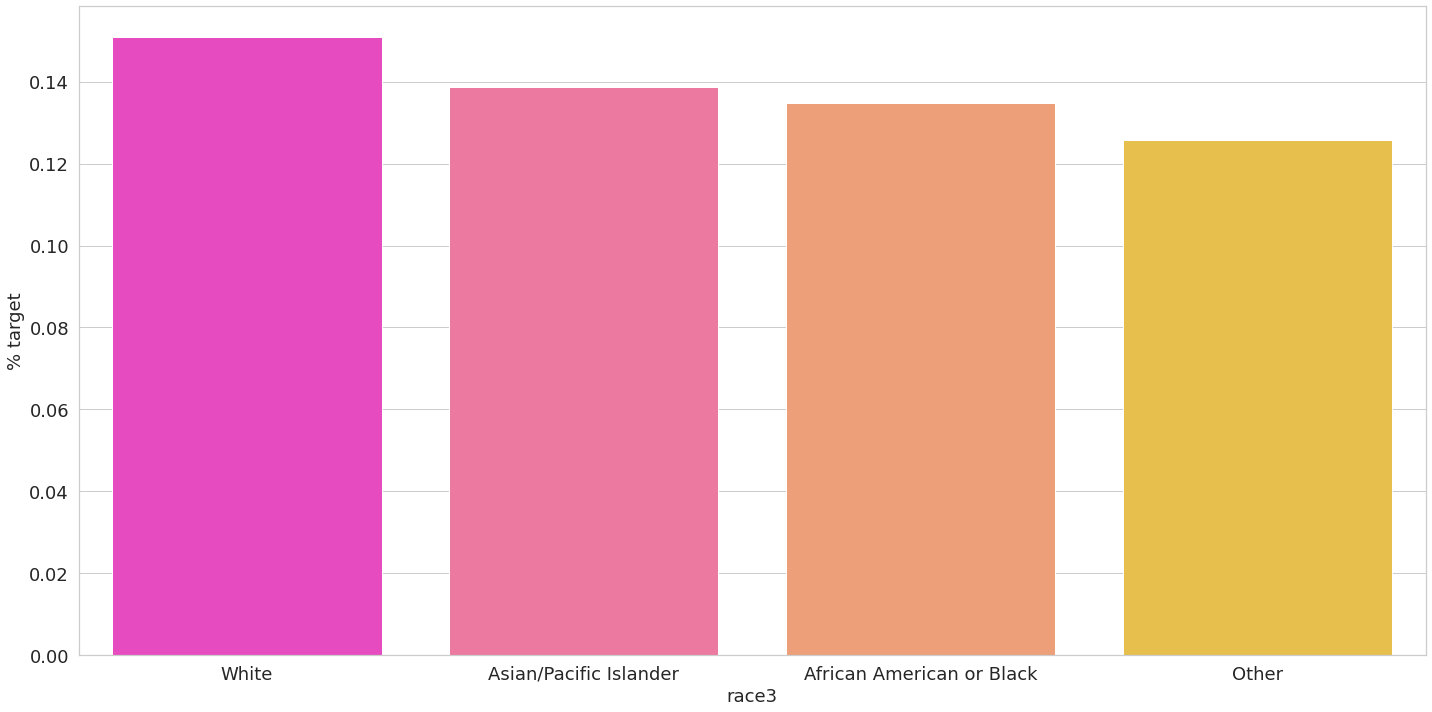

<Figure size 864x360 with 0 Axes>

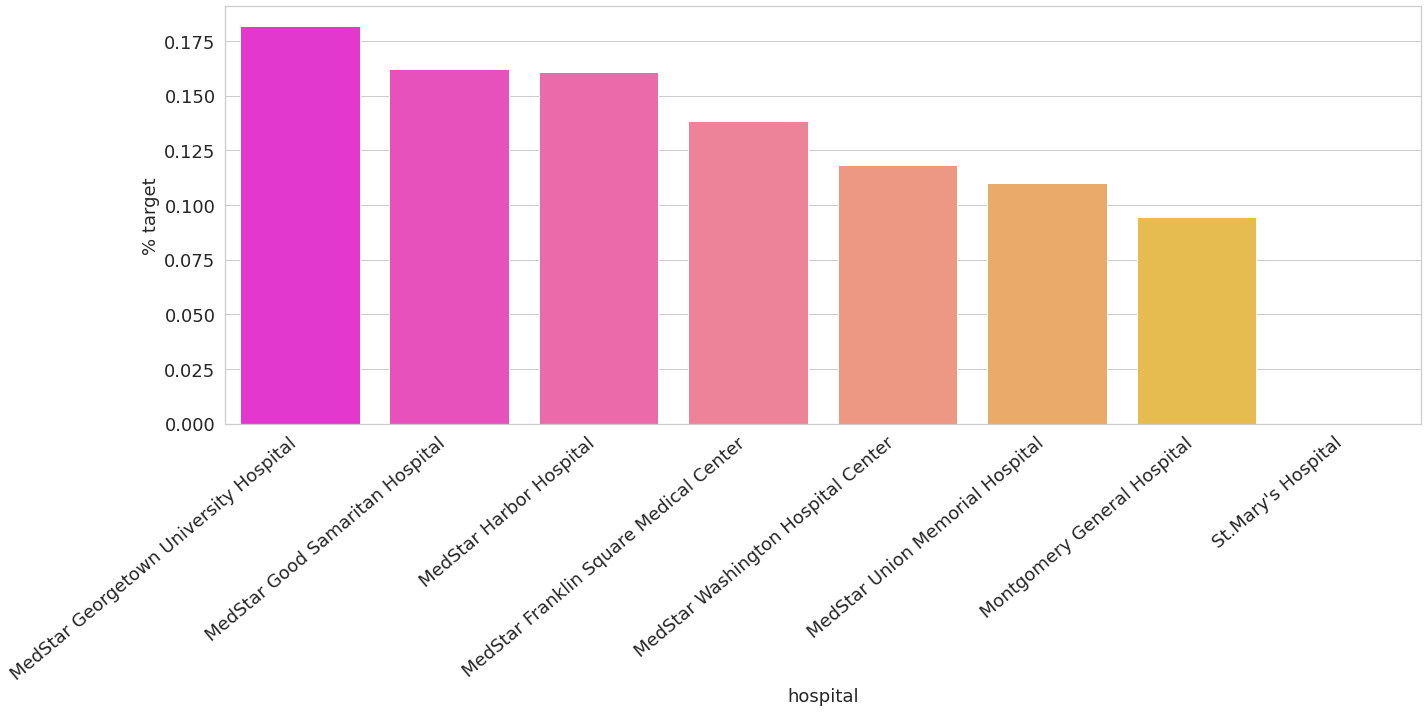

<Figure size 864x360 with 0 Axes>

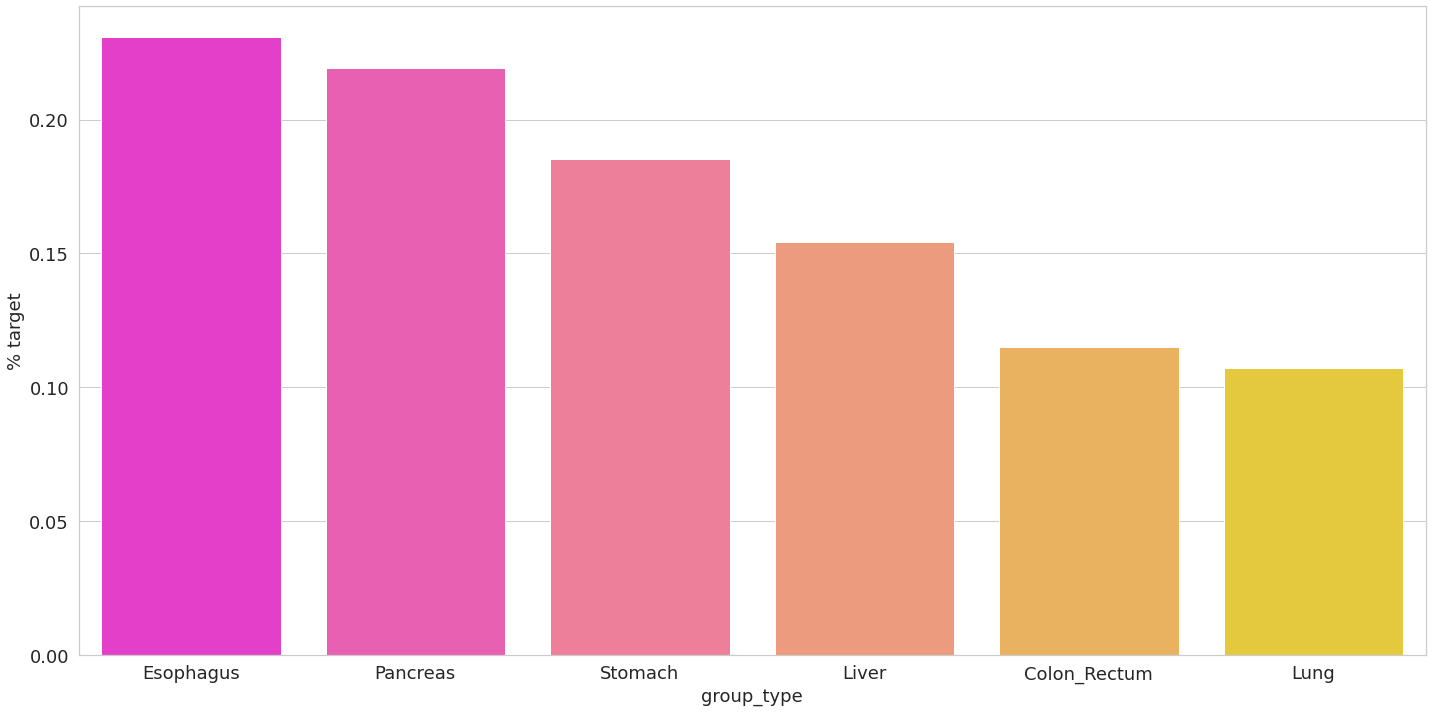

<Figure size 864x360 with 0 Axes>

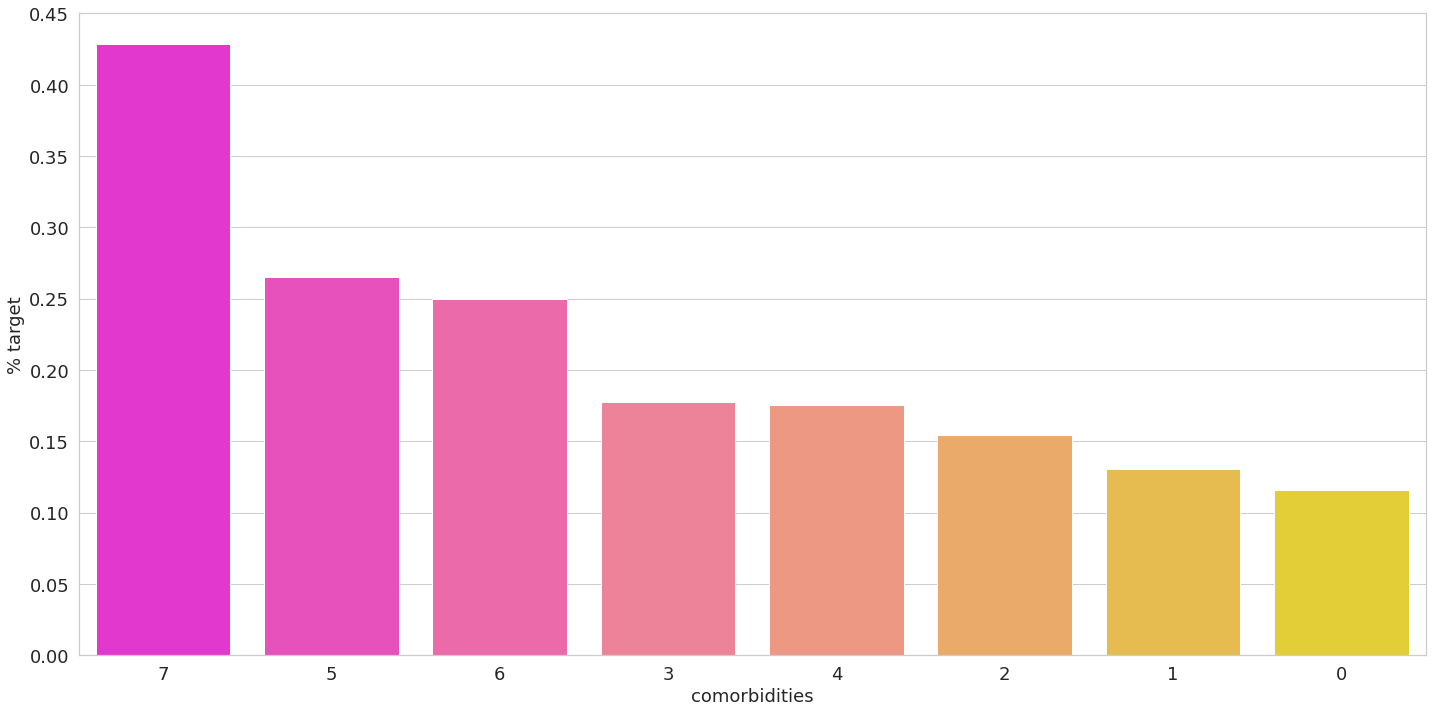

<Figure size 864x360 with 0 Axes>

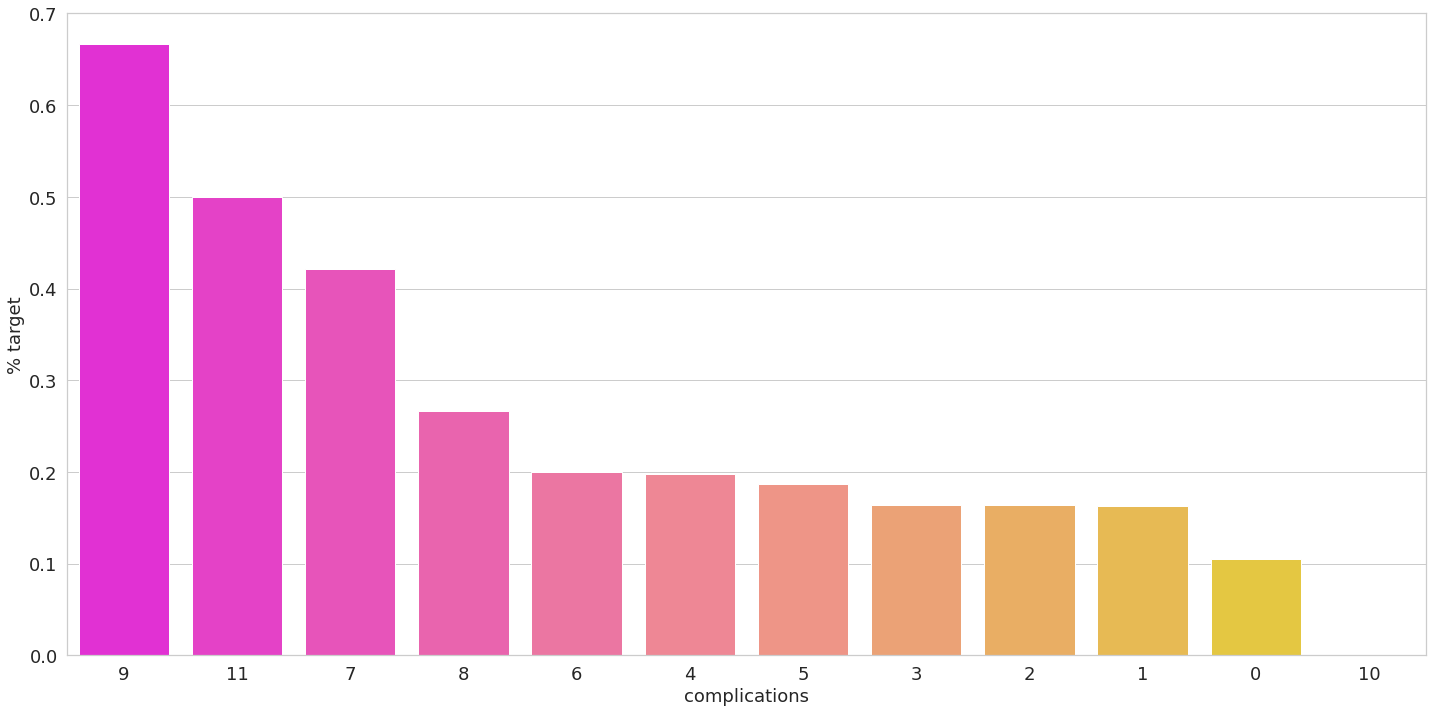

In [86]:
categorical_fea = ['gender', 'race3', 'hospital', 'group_type', 'comorbidities', 'complications']

for f in categorical_fea:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = df[[f, 'readmission_30']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='readmission_30', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='readmission_30', data=cat_perc, order=cat_perc[f], palette='spring')
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    if f == "hospital": ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show();

### Distribution Plot

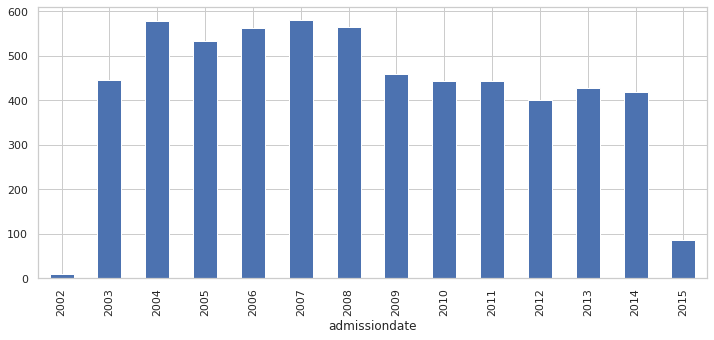

In [87]:
df['readmission_30'].groupby(df.admissiondate.astype("datetime64").dt.year).count().plot(kind="bar")

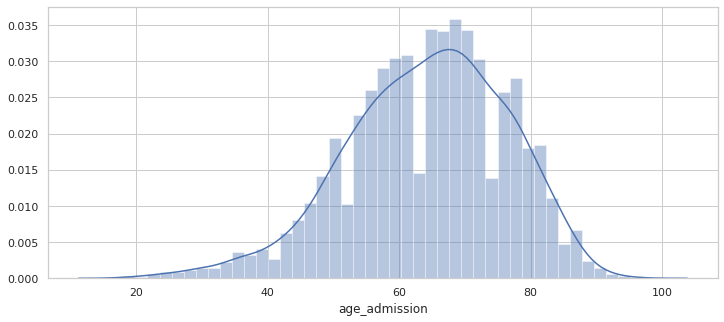

In [88]:
age = cancer_df["age_admission"]
sns.distplot(age)

### Correlation Plot

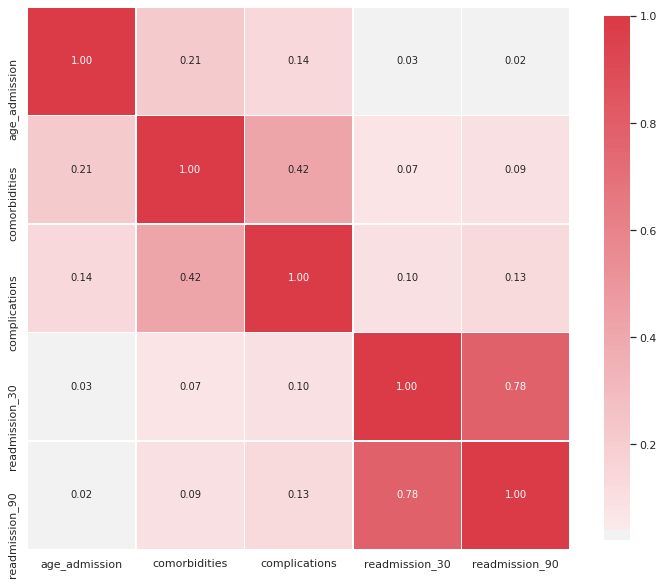

In [89]:
def corr_heatmap(v):
    correlations = df[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.tight_layout()
    plt.show();
corr_heatmap(fea_col)

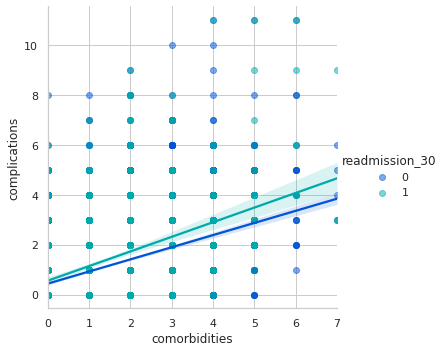

In [90]:
sns.lmplot(x='comorbidities', y='complications', data=df, hue='readmission_30', palette='winter', scatter_kws={'alpha':0.5})
plt.show()

White                        3269
African American or Black    1744
Other                         835
Asian/Pacific Islander        101
Name: race3, dtype: int64


<Figure size 7200x1440 with 0 Axes>

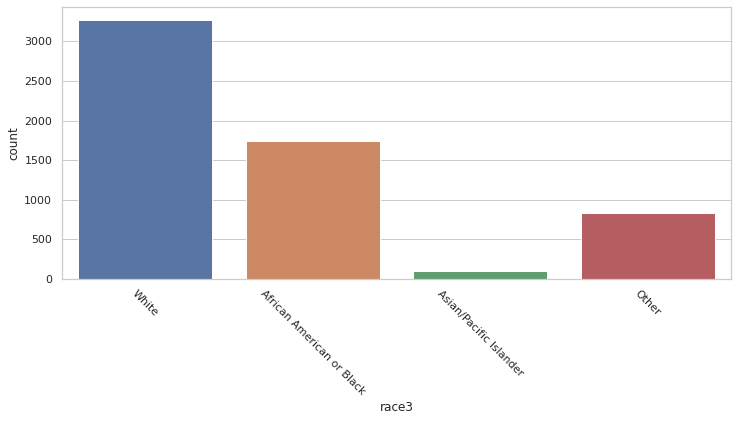

<Figure size 7200x1440 with 0 Axes>

In [91]:
sns.set(style="whitegrid")
ax = sns.countplot(x="race3", data=df)
print(df['race3'].value_counts())

plt.xticks(rotation = -45)
plt.figure(figsize=(100, 20))

## Data Transformation

In [92]:
# df

### Under Sampling

In [93]:
from sklearn.utils import shuffle
desired_apriori=0.2

# Get the indices per target value
idx_0 = df[df['readmission_30'] == 0].index
idx_1 = df[df['readmission_30'] == 1].index

# Get original number of records per target value
nb_0 = len(df.loc[idx_0])
nb_1 = len(df.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
df_undersample = df.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.6640533124264993
Number of records with target=0 after undersampling: 3387


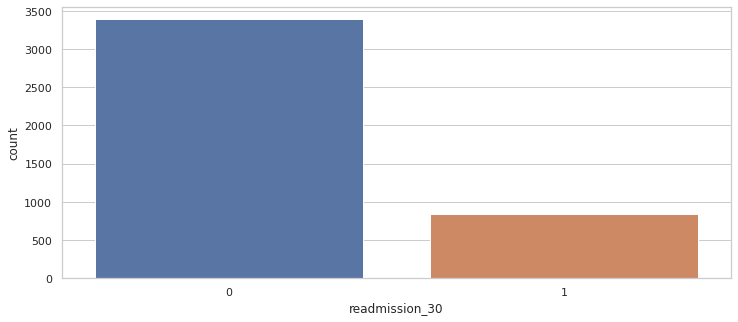

In [94]:
sns.countplot(df_undersample.readmission_30)

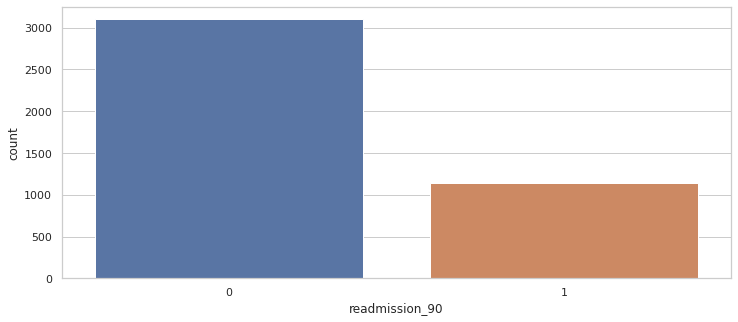

In [95]:
sns.countplot(df_undersample.readmission_90)

### Train Test Split

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(df_undersample.drop(["readmission_30", "readmission_90"], axis= 1), df_undersample['readmission_30'], df_undersample['readmission_90'], test_size=0.2, random_state=102)

## Categorical Data Encoding

### Target Encoding

In [97]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [98]:
col_target_encode = ['gender', 'age_admission', 'race3', 'hospital', 'group_type', 'comorbidities', 'complications', 'admissiondate']

for i in col_target_encode:
  X_train[i], X_test[i] = target_encode(X_train[i], 
                             X_test[i], 
                             target=y1_train, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

In [99]:
X_train.head()

,gender,age_admission,race3,hospital,group_type,comorbidities,complications,admissiondate
3343,0.212571,0.172662,0.189502,0.152126,0.163571,0.207464,0.154922,0.203004
1462,0.215014,0.197709,0.201578,0.250922,0.234636,0.235936,0.156933,0.204475
177,0.184821,0.194797,0.210911,0.190691,0.161242,0.207442,0.155896,0.202052
3167,0.186675,0.168798,0.186072,0.168905,0.259170,0.192477,0.276319,0.198385
2984,0.213315,0.208503,0.208850,0.192824,0.160103,0.210049,0.226497,0.197918


In [100]:
# combine train, test set 
df_for_te = pd.concat([X_train,X_test],axis=0)

y1 = pd.concat([y1_train,y1_test],axis=0)
y2 = pd.concat([y2_train,y2_test],axis=0)

### One Hot Encoding

In [101]:
df_for_oe = df_undersample

In [102]:
# partition by age group
def age_group(x):
  if (x >= 65) & (x <= 69):
    return 0
  elif (x >= 70) & (x <= 74):
    return 1
  elif (x >= 75) & (x <= 79):
    return 2
  else:
    return 3

df_for_oe.age_admission = df_for_oe.age_admission.apply(lambda x: age_group(x))

In [103]:
# So as comorbidities and complications
def c_group(x):
  if x == 0:
    return 0
  elif x == 1:
    return 1
  elif x == 2:
    return 2
  else:
    return 3


df_for_oe.comorbidities = df_for_oe.comorbidities.apply(lambda x: c_group(x))

df_for_oe.complications = df_for_oe.complications.apply(lambda x: c_group(x))


In [104]:
df_for_oe.head()

,gender,age_admission,race3,hospital,group_type,comorbidities,complications,admissiondate,readmission_30,readmission_90
0,Male,3,White,MedStar Washington Hospital Center,Colon_Rectum,1,0,2/24/2007,0,0
1,Female,0,White,MedStar Georgetown University Hospital,Lung,2,3,1/5/2011,0,0
2,Male,3,African American or Black,MedStar Georgetown University Hospital,Stomach,0,0,4/12/2006,0,1
3,Male,1,Other,MedStar Washington Hospital Center,Stomach,0,0,3/26/2004,0,0
4,Female,3,African American or Black,MedStar Georgetown University Hospital,Stomach,2,1,3/12/2013,0,0


In [105]:
df_for_oe.admissiondate = df_for_oe["admissiondate"].map(lambda x: x[-4:]) #Only take the last four number as the year
df_for_oe.head()

,gender,age_admission,race3,hospital,group_type,comorbidities,complications,admissiondate,readmission_30,readmission_90
0,Male,3,White,MedStar Washington Hospital Center,Colon_Rectum,1,0,2007,0,0
1,Female,0,White,MedStar Georgetown University Hospital,Lung,2,3,2011,0,0
2,Male,3,African American or Black,MedStar Georgetown University Hospital,Stomach,0,0,2006,0,1
3,Male,1,Other,MedStar Washington Hospital Center,Stomach,0,0,2004,0,0
4,Female,3,African American or Black,MedStar Georgetown University Hospital,Stomach,2,1,2013,0,0


In [106]:
for i in df_for_oe.columns:
  df_for_oe[i] = df_for_oe[i].apply(lambda x : str(x))

In [107]:
df_for_oe = pd.get_dummies(df_for_oe[fea_col[:-2]],drop_first=True)
df_for_oe.head()

,gender_Male,age_admission_1,age_admission_2,age_admission_3,race3_Asian/Pacific Islander,race3_Other,race3_White,hospital_MedStar Georgetown University Hospital,hospital_MedStar Good Samaritan Hospital,hospital_MedStar Harbor Hospital,hospital_MedStar Union Memorial Hospital,hospital_MedStar Washington Hospital Center,hospital_Montgomery General Hospital,hospital_St.Mary's Hospital,group_type_Esophagus,group_type_Liver,group_type_Lung,group_type_Pancreas,group_type_Stomach,comorbidities_1,comorbidities_2,comorbidities_3,complications_1,complications_2,complications_3,admissiondate_2003,admissiondate_2004,admissiondate_2005,admissiondate_2006,admissiondate_2007,admissiondate_2008,admissiondate_2009,admissiondate_2010,admissiondate_2011,admissiondate_2012,admissiondate_2013,admissiondate_2014,admissiondate_2015
0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [108]:
y1_oe = df_undersample['readmission_30'].astype(int)
y2_oe = df_undersample['readmission_90'].astype(int)
X_train_oe, X_test_oe, y1_train_oe, y1_test_oe, y2_train_oe, y2_test_oe = train_test_split(df_for_oe, y1_oe, y2_oe, test_size=0.2, random_state=102)

### Label Encoding

In [109]:
df_for_le = df_undersample

In [110]:
encoder = LabelEncoder()
df_for_le = df_for_le[fea_col[:-2]].apply(encoder.fit_transform)

In [111]:
df_for_le.head()

,gender,age_admission,race3,hospital,group_type,comorbidities,complications,admissiondate
0,1,3,3,5,0,1,0,5
1,0,0,3,1,3,2,3,9
2,1,3,0,1,5,0,0,4
3,1,1,2,5,5,0,0,2
4,0,3,0,1,5,2,1,11


In [112]:
y1_le = df_undersample['readmission_30'].astype(int)
y2_le = df_undersample['readmission_90'].astype(int)
X_train_le, X_test_le, y1_train_le, y1_test_le, y2_train_le, y2_test_le = train_test_split(df_for_le, y1_le, y2_le, test_size=0.2, random_state=102)

## Chi Square Test

In [113]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_features = df.columns[:10]
df_2 = df[categorical_features].apply(encoder.fit_transform)

In [114]:
df_2.to_csv('labelencoder_df.csv')

In [115]:
df.race3.value_counts()

White                        3269
African American or Black    1744
Other                         835
Asian/Pacific Islander        101
Name: race3, dtype: int64

In [116]:
d1 = df[['race3','readmission_30']]

In [117]:
a = d1[d1.readmission_30 == '0'].iloc[:,0].value_counts()/ sum(d1[d1.readmission_30 == '0'].iloc[:,0].value_counts())
print('target = 1','\n', round(a,2))

target = 1 
 Series([], Name: race3, dtype: float64)


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [118]:
def trans(df, col, target):
  data = df[[col,target]]
  v1 = data[data[target] == '0'].iloc[:,0].value_counts()/ sum(data[data[target] == '0'].iloc[:,0].value_counts())
  print('target = 0')
  print(round(100*v1,1))
  print('分割～～～～～～～～～～～～～～～～')
  v2 = data[data[target] == '1'].iloc[:,0].value_counts()/ sum(data[data[target] == '1'].iloc[:,0].value_counts())
  print('target = 1')
  print(round(100*v2,1))
  print("结束==============================")

In [119]:
# col_to_use = ['gender', 'age_admission', 'race3', 'hospital', 'group_type', 'comorbidities',
#        'complications', 'admissiondate']  # primary_insurance_plan

# for col in col_to_use:
#   trans(df,col,'readmission_30')
#   print("前面是30<<<<<<<<<<#####>>>>>>>>>>后面是90")
#   trans(df,col,'readmission_90')

In [120]:
df_2 = df[categorical_features].apply(encoder.fit_transform)

In [121]:
df_2

,gender,age_admission,race3,hospital,group_type,comorbidities,complications,admissiondate,readmission_30,readmission_90
0,1,39,3,6,0,1,3,1178,0,0
1,1,44,3,6,0,0,0,2147,0,0
2,0,52,0,6,0,2,2,250,0,0
3,0,46,3,6,0,1,4,477,0,1
4,0,72,0,6,0,4,5,1305,0,0
...,...,...,...,...,...,...,...,...,...,...
5948,0,61,3,7,0,2,0,2274,0,0
5949,0,45,0,7,0,1,2,1446,0,0
5950,1,38,3,7,0,1,0,782,0,0
5951,1,31,3,7,0,0,0,2466,0,0


## Normalization 

In [122]:
# def norm(col):
#   return col / np.sqrt(np.sum([x**2 for x in col]))

# for i in X_train.columns:
#   X_train[i] = norm(X_train[i])
#   X_test[i] = norm(X_test[i])

In [123]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# X_train_scale = scaler.fit_transform(X_train)
# X_test_scale = scaler.transform(X_test)

## Data Modeling

### Logistic Regression

In [126]:
# target encoding
clf_1 = LogisticRegression(max_iter = 200, random_state=0).fit(X_train, y1_train)
pred_1 = clf_1.predict(X_test)
prob_1 = clf_1.predict_proba(X_test)


# one hot encoding
clf_2 = LogisticRegression(max_iter = 200, random_state=0).fit(X_train_oe, y1_train_oe)
pred_2 = clf_2.predict(X_test_oe)
prob_2 = clf_2.predict_proba(X_test_oe)

# label encoding
clf_3 = LogisticRegression(max_iter = 200, random_state=0).fit(X_train_le, y1_train_le)
pred_3 = clf_3.predict(X_test_le)
prob_3 = clf_3.predict_proba(X_test_le)

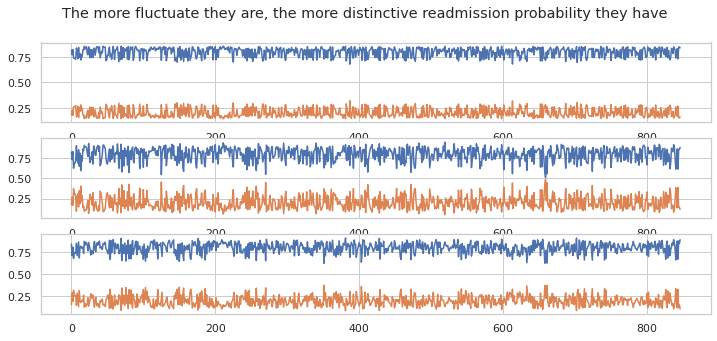

In [127]:
fig, axs = plt.subplots(3)
fig.suptitle('The more fluctuate they are, the more distinctive readmission probability they have')
axs[0].plot(pd.DataFrame(prob_1))
axs[1].plot(pd.DataFrame(prob_2))
axs[2].plot(pd.DataFrame(prob_3))

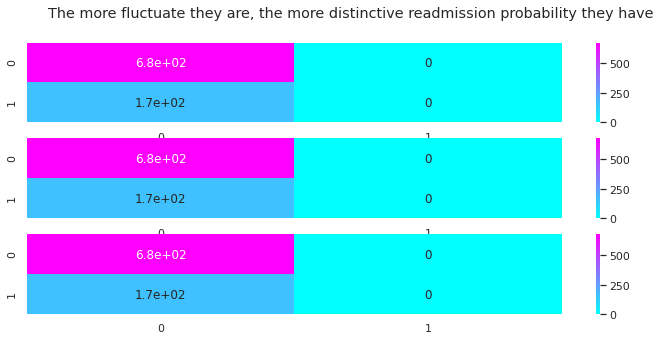

In [128]:
fig, axs = plt.subplots(3)
fig.suptitle('The more fluctuate they are, the more distinctive readmission probability they have')

sns.heatmap(pd.DataFrame(confusion_matrix(y1_test, pred_1)), annot=True, ax=axs[0], cmap='cool')
sns.heatmap(pd.DataFrame(confusion_matrix(y1_test_oe, pred_2)), annot=True, ax=axs[1], cmap='cool')
sns.heatmap(pd.DataFrame(confusion_matrix(y1_test_le, pred_3)), annot=True, ax=axs[2], cmap='cool')

### XGBoost

In [129]:
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50, readmission = 'readmission_30'):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[readmission].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[readmission],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain[readmission].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[readmission], dtrain_predprob))
    print(confusion_matrix(dtrain_predictions,dtrain[readmission].values))
    print(classification_report(dtrain_predictions,dtrain[readmission].values))

    pd.DataFrame(alg.predict_proba(dtrain[predictors])).plot()
    plt.show()

    sns.heatmap(pd.DataFrame(confusion_matrix(dtrain_predictions,dtrain[readmission].values)), annot=True, cmap='viridis', fmt="d")
    plt.show()


    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9745
AUC Score (Train): 0.999922
[[3387  108]
 [   0  739]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3495
           1       0.87      1.00      0.93       739

    accuracy                           0.97      4234
   macro avg       0.94      0.98      0.96      4234
weighted avg       0.98      0.97      0.98      4234



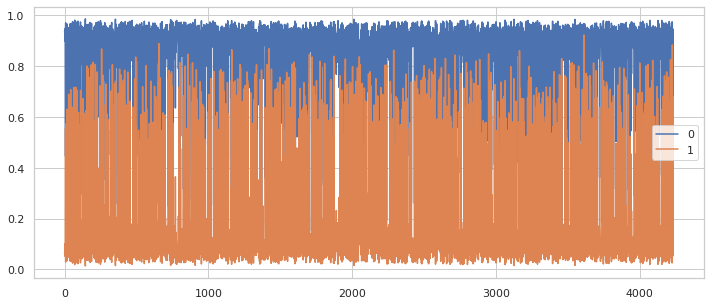

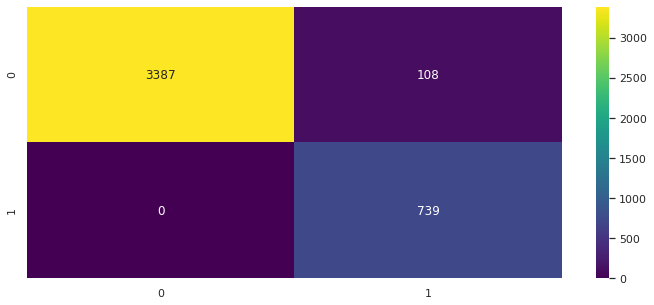

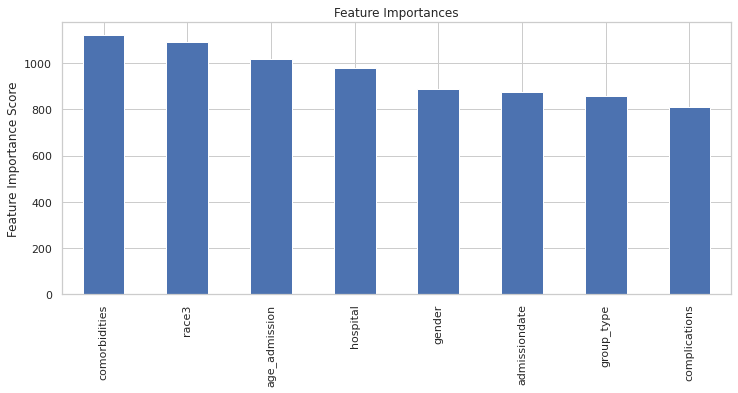

In [130]:
# target encoding
df_for_te['readmission_30'] = y1.astype(int)
# X_train['readmission_90'] = y2_train.astype(int)
predictors = [x for x in df_for_te.columns[:-1]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=60,
 max_depth=11,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=22902)
modelfit(xgb1, df_for_te, predictors, readmission = "readmission_30")


Model Report
Accuracy : 0.8793
AUC Score (Train): 0.958610
[[3373  497]
 [  14  350]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      3870
           1       0.41      0.96      0.58       364

    accuracy                           0.88      4234
   macro avg       0.70      0.92      0.75      4234
weighted avg       0.95      0.88      0.90      4234



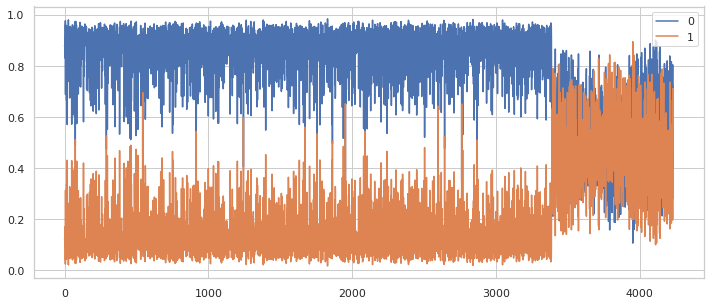

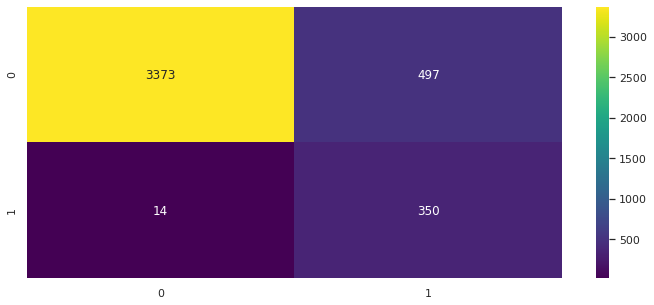

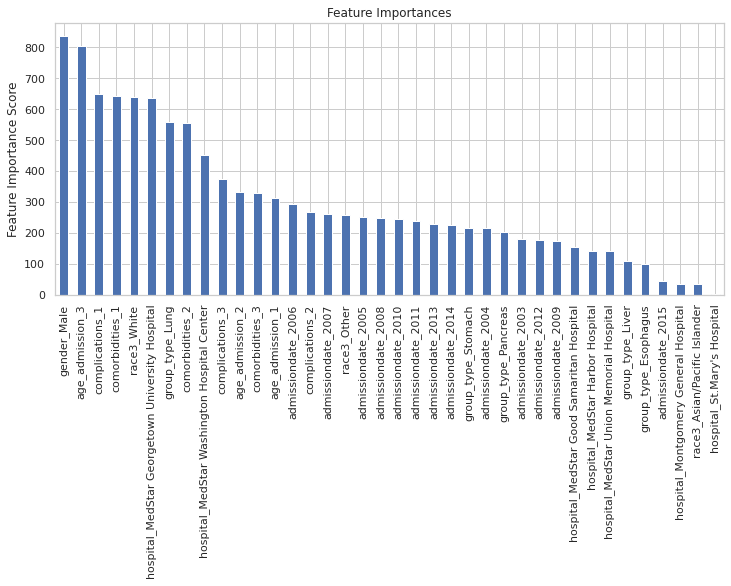

In [131]:
# one hot encoding
df_for_oe['readmission_30'] = y1_oe.astype(int)
# X_train['readmission_90'] = y2_train.astype(int)
predictors = [x for x in df_for_oe.columns[:-1]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=50,
 max_depth=20,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=1)
modelfit(xgb1, df_for_oe, predictors, readmission = "readmission_30")


Model Report
Accuracy : 0.8772
AUC Score (Train): 0.960891
[[3375  508]
 [  12  339]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      3883
           1       0.40      0.97      0.57       351

    accuracy                           0.88      4234
   macro avg       0.70      0.92      0.75      4234
weighted avg       0.95      0.88      0.90      4234



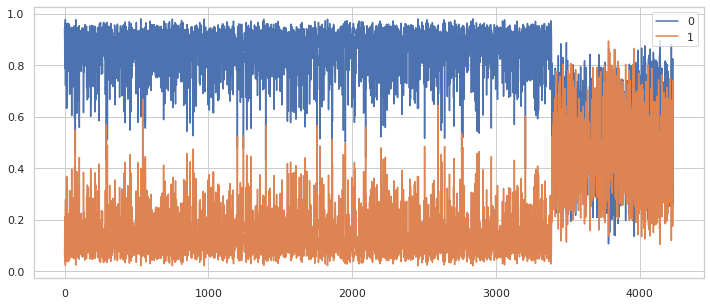

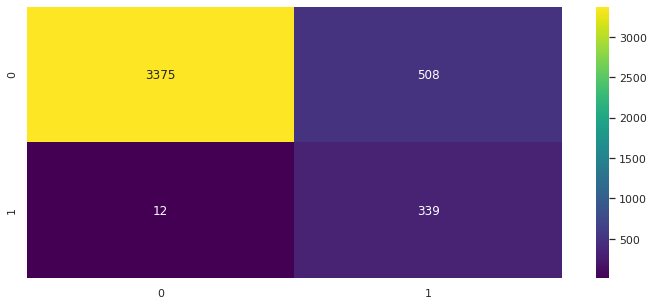

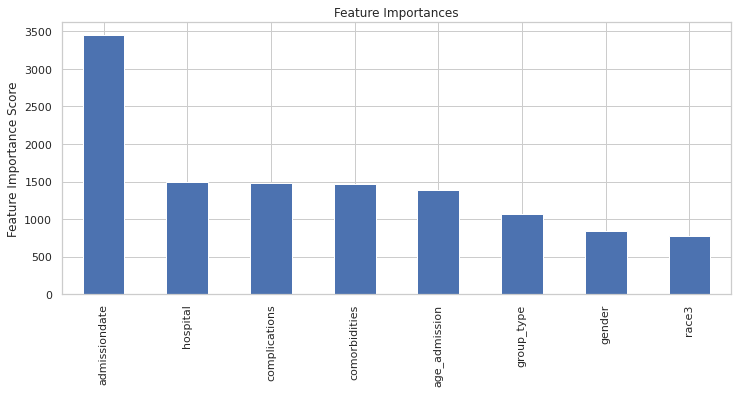

In [132]:
# label encoding
def norm(col):
  return col / np.sqrt(np.sum([x**2 for x in col]))

for i in df_for_le.columns[1:]:
  df_for_le[i] = norm(df_for_le[i])

df_for_le['readmission_30'] = y1_le.astype(int)
# X_train['readmission_90'] = y2_train.astype(int)
predictors = [x for x in df_for_le.columns[:-1]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=50,
 max_depth=20,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=123)
modelfit(xgb1, df_for_le, predictors, readmission = "readmission_30")

### Random Forest

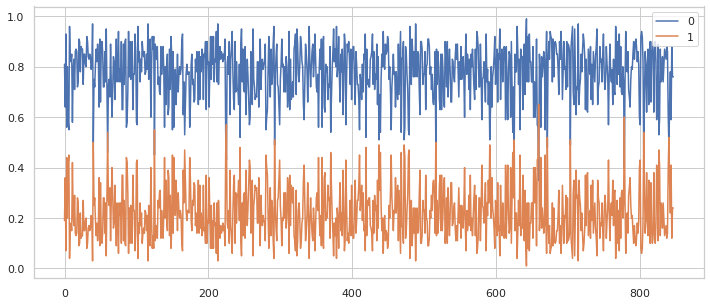

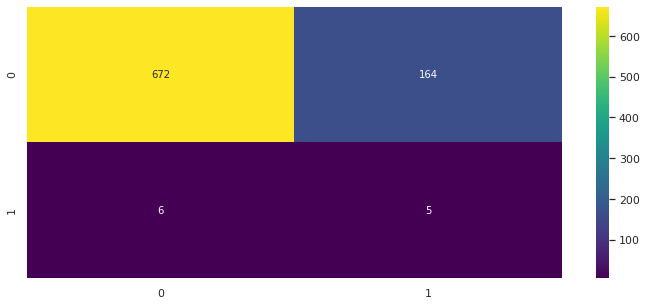

0.510368120647222


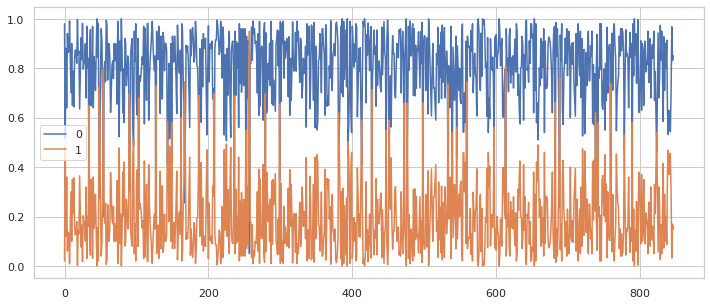

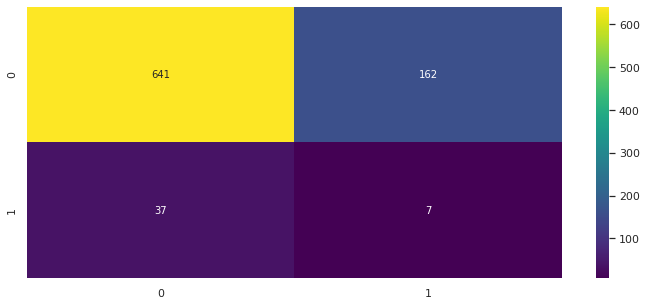

0.49342392347838226


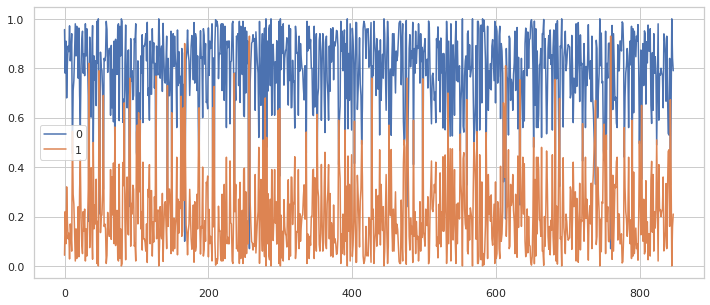

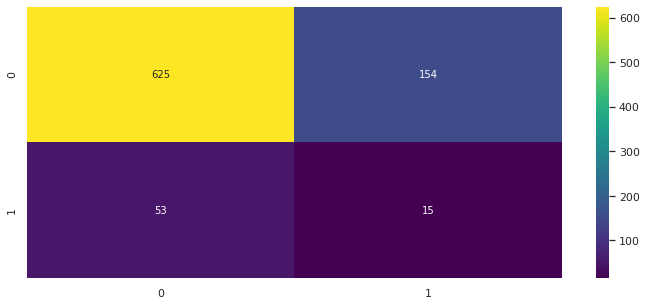

0.5052931525021382


In [146]:
# target encoding
def my_rf(Xtrain,ytrain,Xtest,ytest):
  rf = RandomForestClassifier()
  rf.fit(Xtrain, ytrain)
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
  max_depth=10, max_features='auto', max_leaf_nodes=None,
  min_impurity_split=1e-07, min_samples_leaf=1,
  min_samples_split=2, min_weight_fraction_leaf=0.0,
  n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
  verbose=0, warm_start=False)
  y_pred = rf.predict(Xtest)

  #Print model report:


  pd.DataFrame(rf.predict_proba(Xtest)).plot()
  plt.show()

  sns.heatmap(pd.DataFrame(confusion_matrix(y_pred,ytest)), annot=True, cmap='viridis', fmt="d")
  plt.show()

  false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  print(roc_auc)

my_rf(Xtrain = X_train,
      ytrain = y1_train,
      Xtest = X_test,
      ytest = y1_test)


my_rf(Xtrain = X_train_oe,
      ytrain = y1_train_oe,
      Xtest = X_test_oe,
      ytest = y1_test_oe)

my_rf(Xtrain = X_train_le,
      ytrain = y1_train_le,
      Xtest = X_test_le,
      ytest = y1_test_le)